## CAPSTONE PROJECT 2 : Stock Price Prediction

### by Prachi Chavan (PGA 25)

This project focuses on the analysis and prediction of stock data for major tech companies, including Apple (AAPL), Google (GOOG), Microsoft (MSFT), Amazon (AMZN), and Tesla (TSLA). By leveraging historical stock information, various metrics, and advanced machine learning techniques, the project aims to provide valuable insights for investors.and lstm
aim
conclusion

### Loading the Data 

In [1]:
!pip install -q yfinance

The yfinance is one of the famous modules in Python, which is used to collect online data, and with it, we can collect the financial data of Yahoo.

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo

import yfinance as yf

yf.pdr_override() #used to get stock data
# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN' , 'TSLA']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-19,165.800003,168.160004,165.539993,167.630005,166.740021,47720200,APPLE
2023-04-20,166.089996,167.869995,165.559998,166.649994,165.765182,52456400,APPLE
2023-04-21,165.050003,166.449997,164.490005,165.020004,164.143860,58337300,APPLE
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.452194,41949600,APPLE
2023-04-25,165.190002,166.309998,163.729996,163.770004,162.900482,48714100,APPLE
...,...,...,...,...,...,...,...
2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600,TESLA
2024-04-15,170.240005,170.690002,161.380005,161.479996,161.479996,100245300,TESLA
2024-04-16,156.740005,158.190002,153.750000,157.110001,157.110001,97000000,TESLA


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-19,165.800003,168.160004,165.539993,167.630005,166.740021,47720200,APPLE
2023-04-20,166.089996,167.869995,165.559998,166.649994,165.765182,52456400,APPLE
2023-04-21,165.050003,166.449997,164.490005,165.020004,164.143860,58337300,APPLE
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.452194,41949600,APPLE
2023-04-25,165.190002,166.309998,163.729996,163.770004,162.900482,48714100,APPLE


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600,TESLA
2024-04-15,170.240005,170.690002,161.380005,161.479996,161.479996,100245300,TESLA
2024-04-16,156.740005,158.190002,153.750000,157.110001,157.110001,97000000,TESLA
2024-04-17,157.639999,158.330002,153.779999,155.449997,155.449997,82439700,TESLA
2024-04-18,151.250000,152.199997,148.699997,149.929993,149.929993,95515700,TESLA


In [5]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
company_name     object
dtype: object

In [6]:
df.shape

(1260, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,207.204464,209.548646,204.942528,207.322901,207.003626,5.517889e+07
std,85.539399,86.181969,84.743617,85.494185,85.166152,3.860772e+07
min,101.470001,103.900002,101.150002,102.050003,102.050003,8.828600e+06
25%,140.057499,141.411247,138.731255,140.247494,140.247494,2.339030e+07
50%,177.190002,179.404999,175.910004,177.625000,177.299866,4.507205e+07
75%,251.562496,257.977501,247.324993,252.699993,252.699993,7.154595e+07
max,429.829987,430.820007,427.160004,429.369995,429.369995,2.117971e+08


In [8]:
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2023-04-19 to 2024-04-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


### Exploratory Data Analysis

In [10]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,221.175199,225.333056,216.944007,221.255793,221.255793,1.180601e+08
std,36.908362,37.423567,36.317634,36.873620,36.873620,2.596808e+07
min,151.250000,152.199997,148.699997,149.929993,149.929993,6.450660e+07
25%,185.450001,189.212505,182.107502,186.909996,186.909996,1.015830e+08
50%,229.955002,235.364998,225.959999,232.120003,232.120003,1.136110e+08
75%,251.562496,257.977501,247.324993,252.699993,252.699993,1.315406e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


The data looks like its normally distributed only sligtly shifted from the centre.

In [11]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,181.055318,182.524325,179.706151,181.177103,180.762863,5.778691e+07
std,8.859288,8.703874,8.804734,8.785578,8.789401,1.763266e+07
min,163.059998,165.279999,162.800003,163.759995,162.890533,2.404830e+07
25%,173.157501,174.680004,172.027504,173.637505,173.225121,4.674302e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048981,5.368500e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879902,6.392830e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [12]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,133.704937,135.190254,132.544508,133.901607,133.901607,2.302963e+07
std,12.113903,12.086774,12.079287,12.111229,12.111229,8.411502e+06
min,104.214996,105.724998,103.269997,104.449997,104.449997,8.828600e+06
25%,125.189999,126.664997,123.831251,125.282503,125.282503,1.773015e+07
50%,134.572502,136.160004,132.875000,134.644997,134.644997,2.080060e+07
75%,140.755001,142.297504,139.802494,141.062504,141.062504,2.496985e+07
max,160.279999,161.699997,158.600006,160.789993,160.789993,5.879610e+07


In [13]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,142.677302,144.271032,141.200516,142.796429,142.796429,5.217775e+07
std,21.579194,21.574222,21.502814,21.578791,21.578791,1.954504e+07
min,101.470001,103.900002,101.150002,102.050003,102.050003,2.237840e+07
25%,128.237499,129.822498,126.507502,128.240002,128.240002,4.142802e+07
50%,138.754997,140.140007,137.165001,138.320000,138.320000,4.827710e+07
75%,154.897503,156.202499,153.314995,154.879997,154.879997,5.839938e+07
max,187.720001,189.770004,185.509995,189.050003,189.050003,1.529387e+08


In [14]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,357.409563,360.424564,354.317460,357.483572,356.301436,2.484010e+07
std,38.864647,38.733239,38.596634,38.754111,39.428853,9.541899e+06
min,279.510010,281.600006,275.369995,275.420013,273.177948,1.017660e+07
25%,328.227493,331.052505,324.667503,327.775002,326.454071,1.935645e+07
50%,340.990005,346.560013,338.319992,342.494995,340.449554,2.236705e+07
75%,394.182503,395.190002,390.964996,394.529999,393.801758,2.701165e+07
max,429.829987,430.820007,427.160004,429.369995,429.369995,7.847820e+07


### Data Visualization

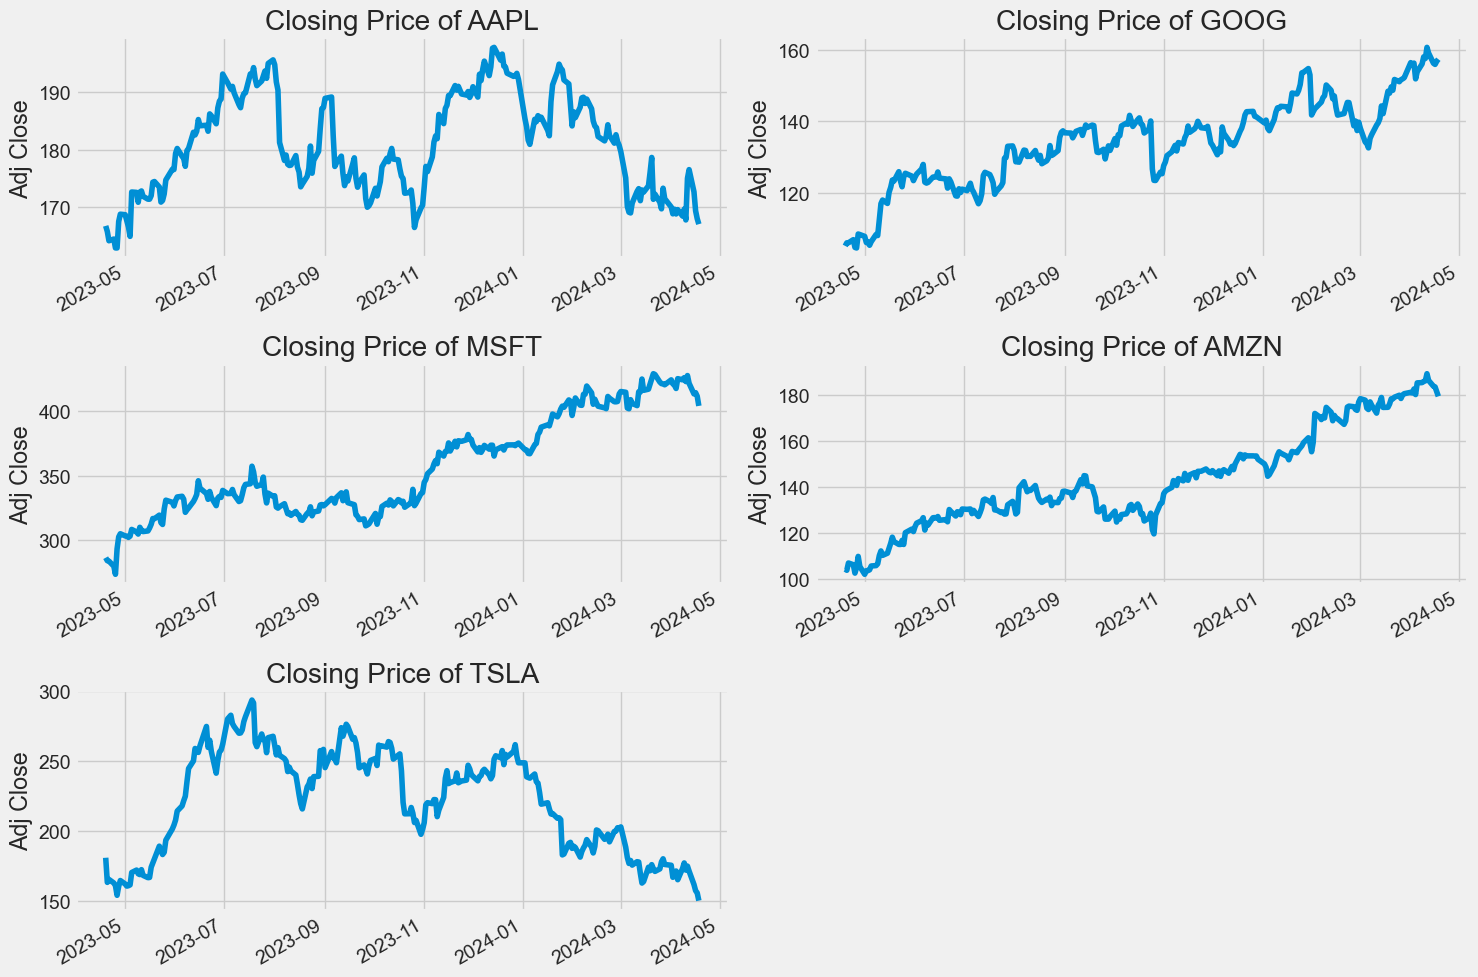

In [15]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

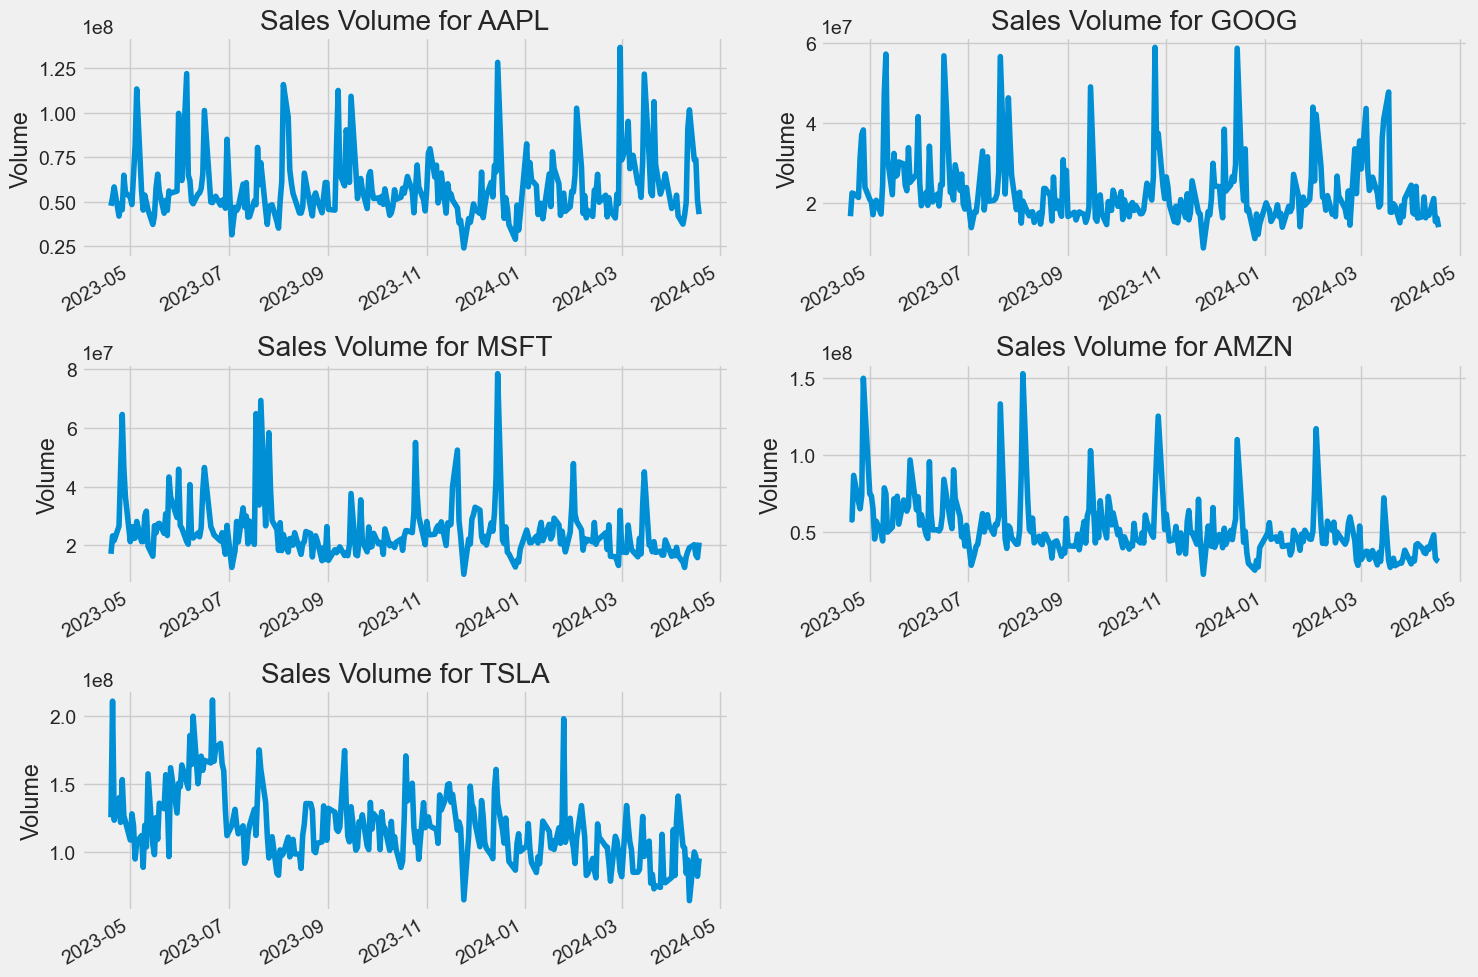

In [16]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [17]:
ma_day = [10, 20, 50] 

# Calculate moving averages and RSI for each company
for ma in ma_day:
    for company in company_list:
        column_name_ma = f"MA for {ma} days"
        company[column_name_ma] = company['Adj Close'].rolling(ma).mean()


In [18]:

# Calculate RSI for each company
rsi_period = 14  # RSI period
for company in company_list:
    delta = company['Adj Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=rsi_period, min_periods=1).mean()
    avg_loss = loss.rolling(window=rsi_period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    company['RSI'] = rsi


In [19]:
company_name

['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESLA']

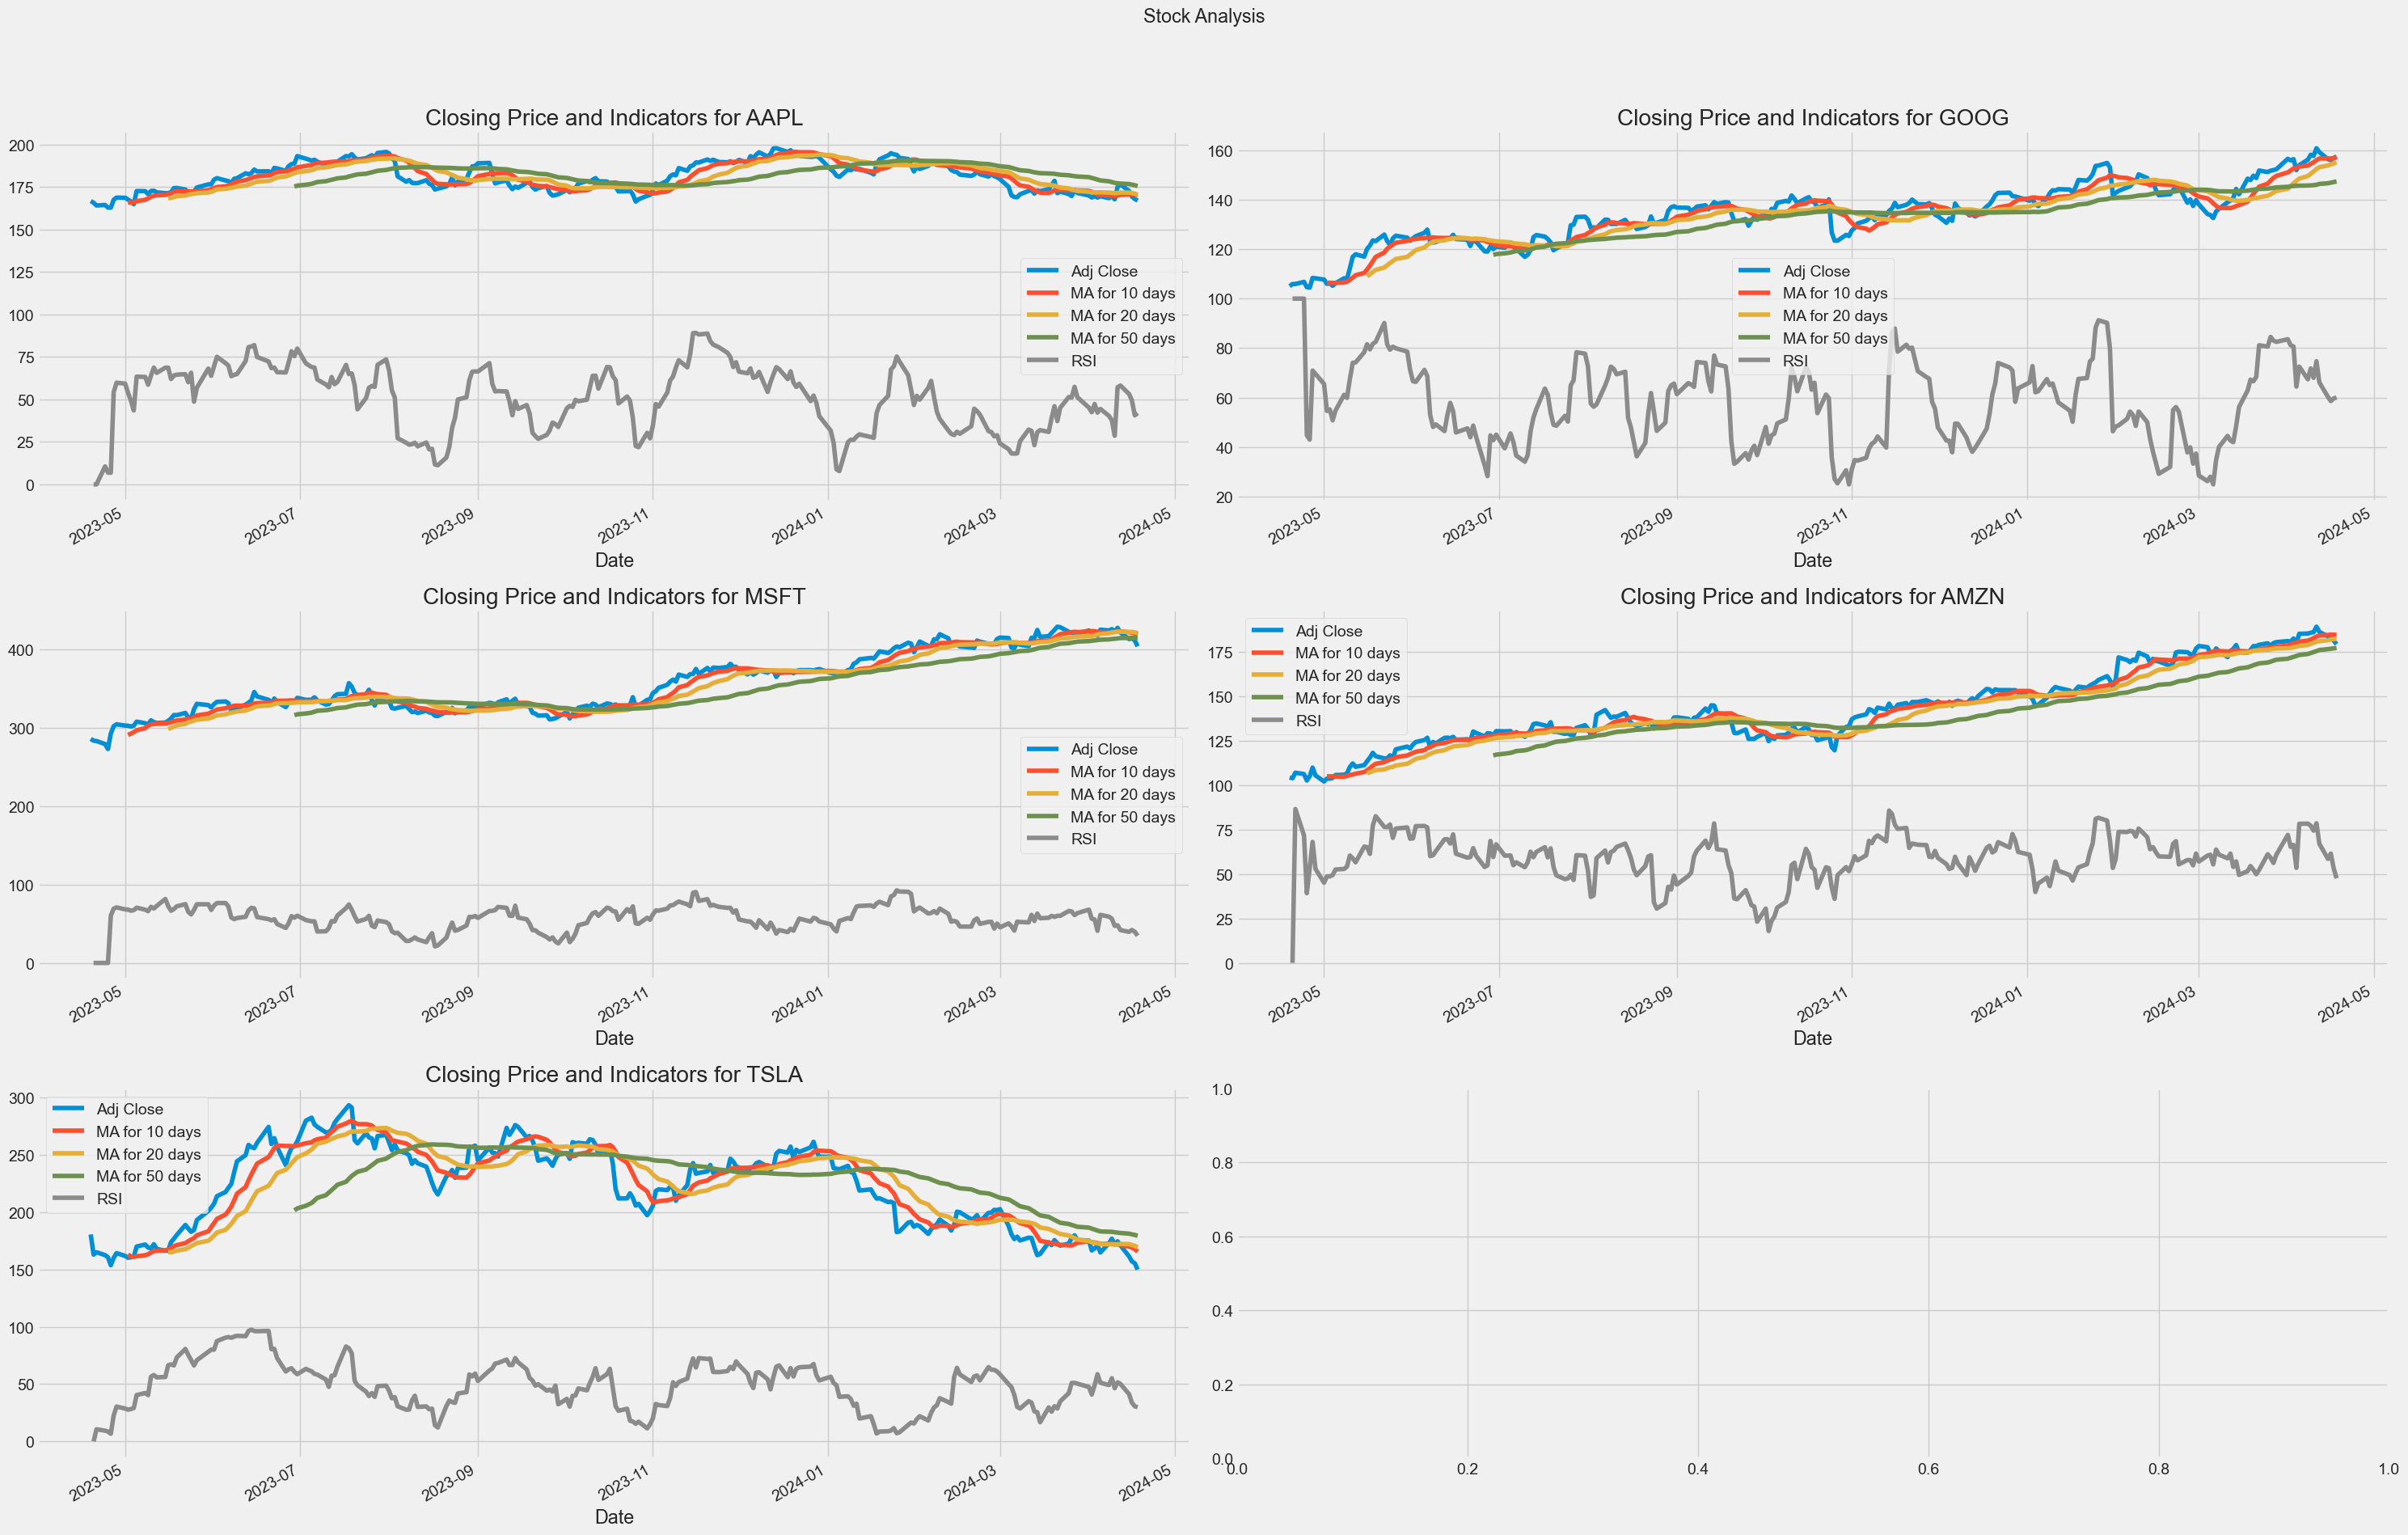

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
fig.suptitle('Stock Analysis')

# List of stock symbols
stock_symbols = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

# Function to plot the data for a given company
def plot_company_data(ax, company_df, stock_symbol):
    company_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'RSI']].plot(ax=ax)
    ax.set_title(f"Closing Price and Indicators for {stock_symbol}")
    ax.legend()

# Plot data for each company on separate graphs
for ax, company_df, stock_symbol in zip(axes.flatten(), [AAPL, GOOG, MSFT, AMZN, TSLA], stock_symbols):
    plot_company_data(ax, company_df, stock_symbol)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


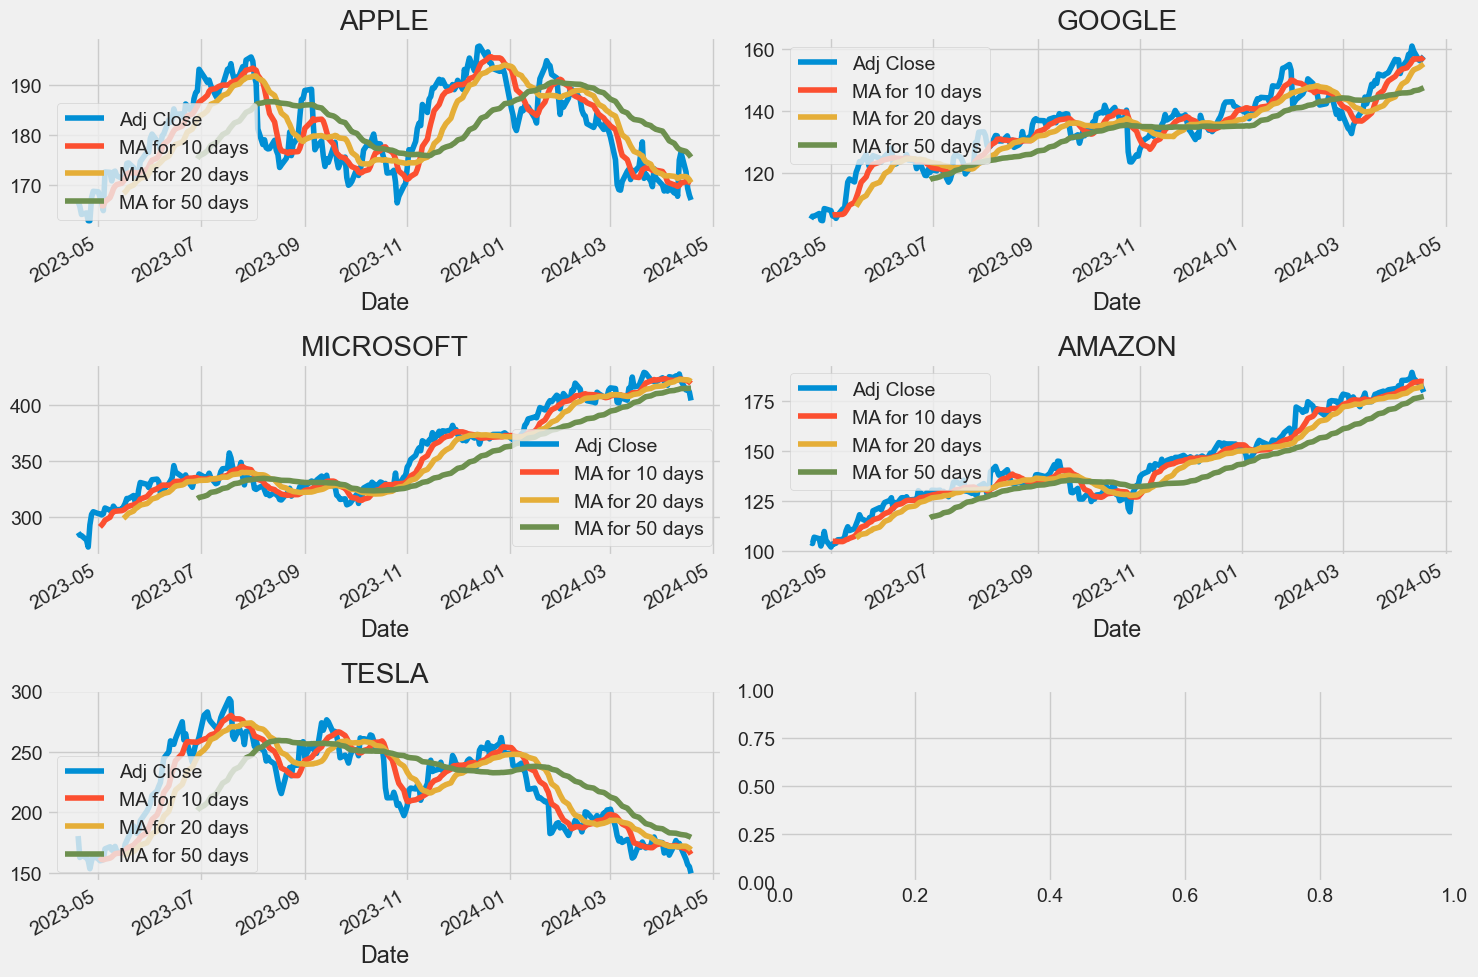

In [21]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2, 0])  # Use a different subplot for TSLA
axes[2, 0].set_title('TESLA')

fig.tight_layout()

plt.show()


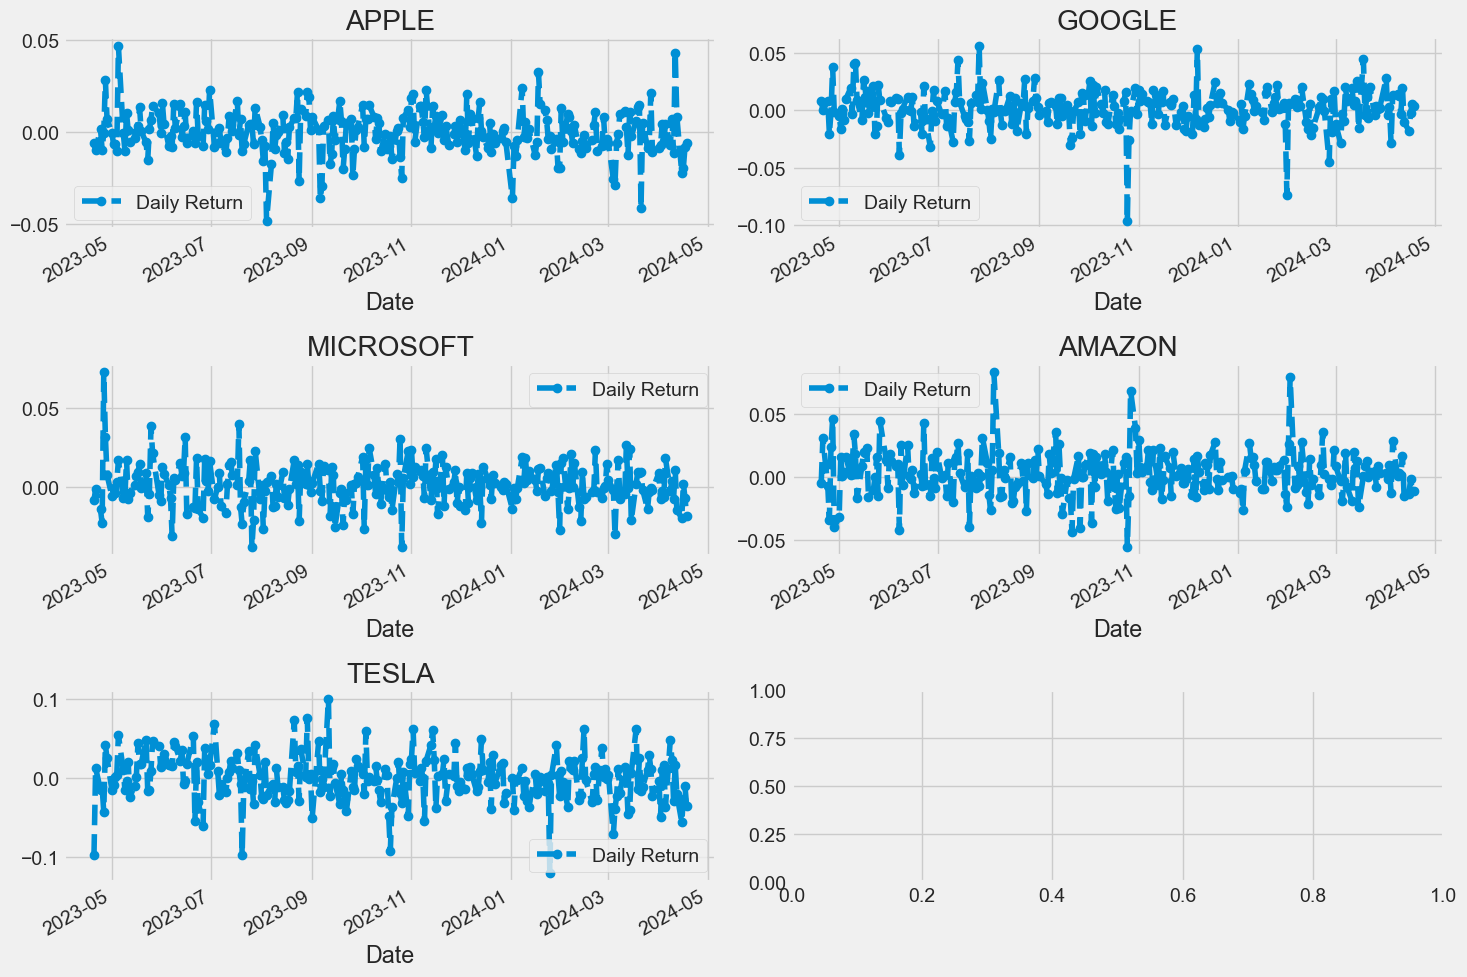

In [22]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

TSLA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TESLA')

fig.tight_layout()

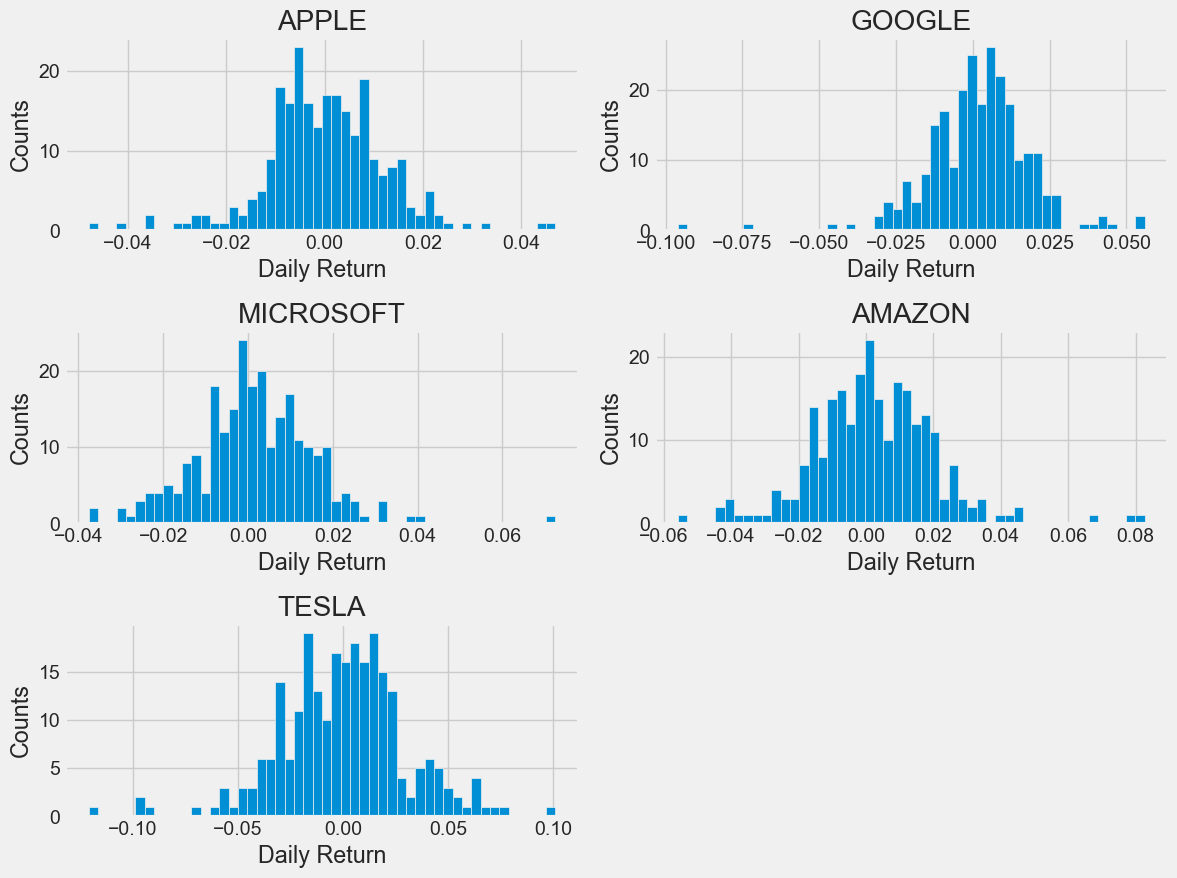

In [23]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [24]:
# Fetch historical data for tech stocks
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2023-04-19,NaN,NaN,NaN,NaN,NaN
2023-04-20,-0.005846,-0.004698,0.008379,-0.008112,-0.097458
2023-04-21,-0.009781,0.030344,0.000094,-0.001223,0.012823
2023-04-24,0.001878,-0.007012,0.008214,-0.013963,-0.015326
2023-04-25,-0.009436,-0.034272,-0.020322,-0.022536,-0.011566


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


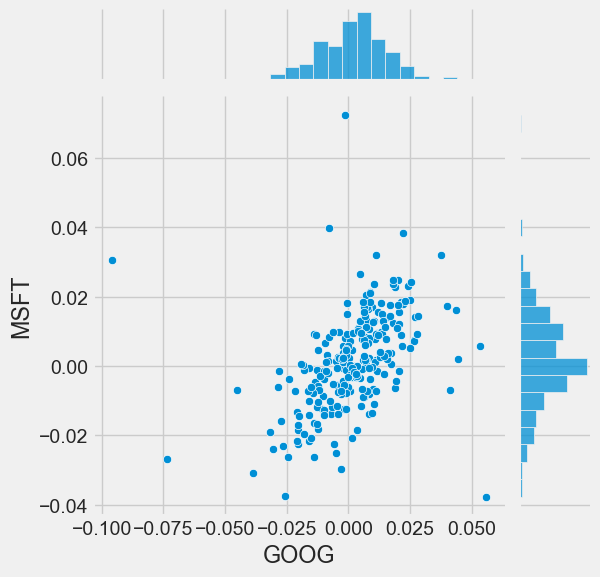

In [25]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

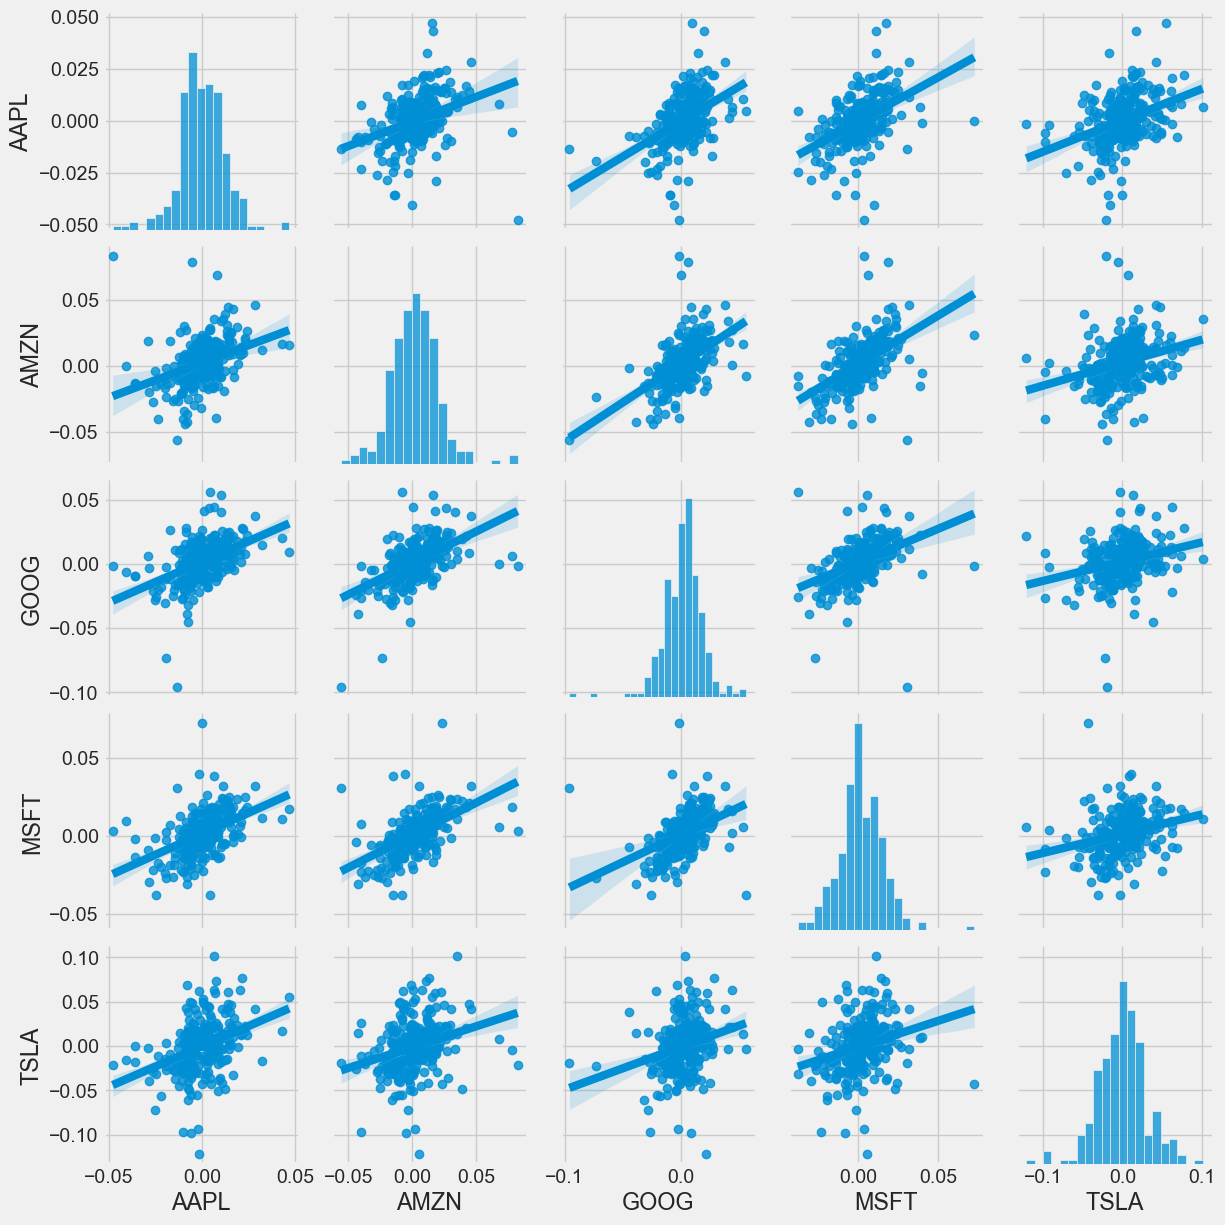

In [26]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

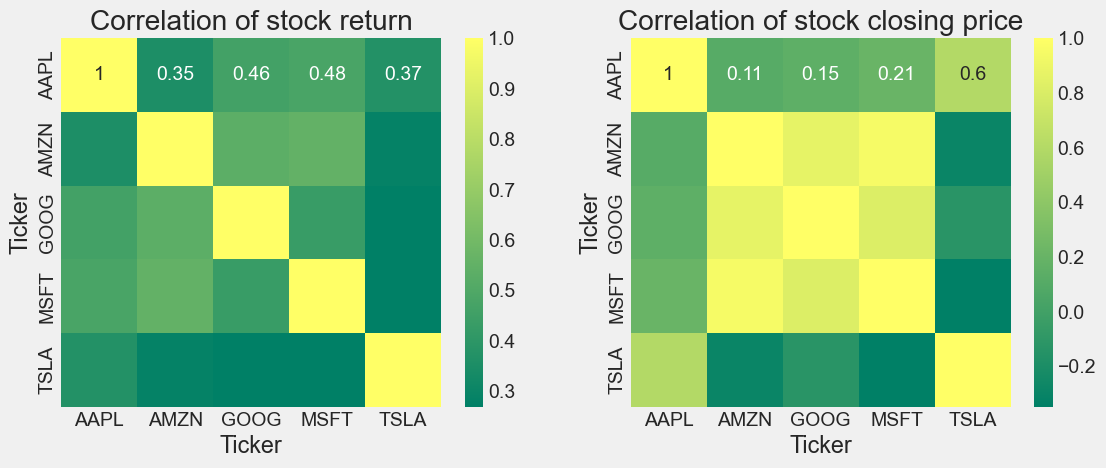

In [27]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price' )

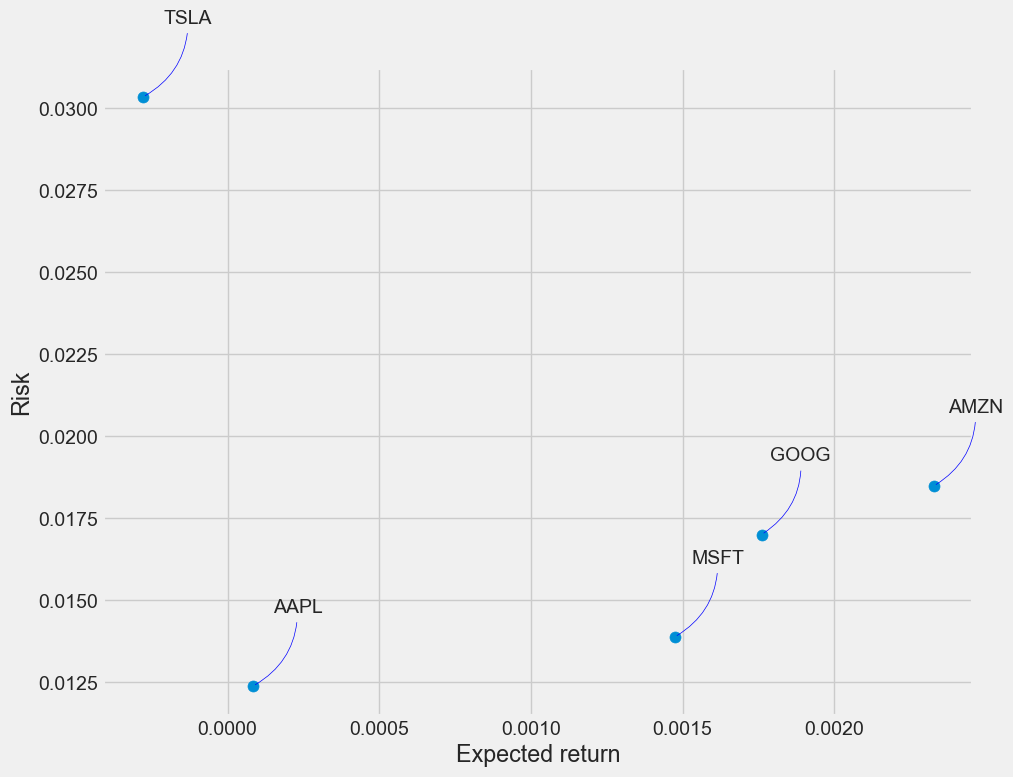

In [28]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### Paying attention to only one specific stock for further prediction

In [29]:
# Get the stock quote
df = yf.download('TSLA', start='2018-01-01', end=datetime.now())
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...
2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600
2024-04-15,170.240005,170.690002,161.380005,161.479996,161.479996,100245300
2024-04-16,156.740005,158.190002,153.750000,157.110001,157.110001,97000000


In [30]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1.584000e+03
mean,148.125347,151.412060,144.570068,148.069084,148.069084,1.317540e+08
std,111.444694,113.852324,108.740861,111.308747,111.308747,8.203661e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,22.514166,22.977833,22.145167,22.474166,22.474166,8.165820e+07
50%,170.045006,174.610001,166.989998,171.080002,171.080002,1.080570e+08
75%,239.430000,244.716671,234.684170,239.396664,239.396664,1.519086e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


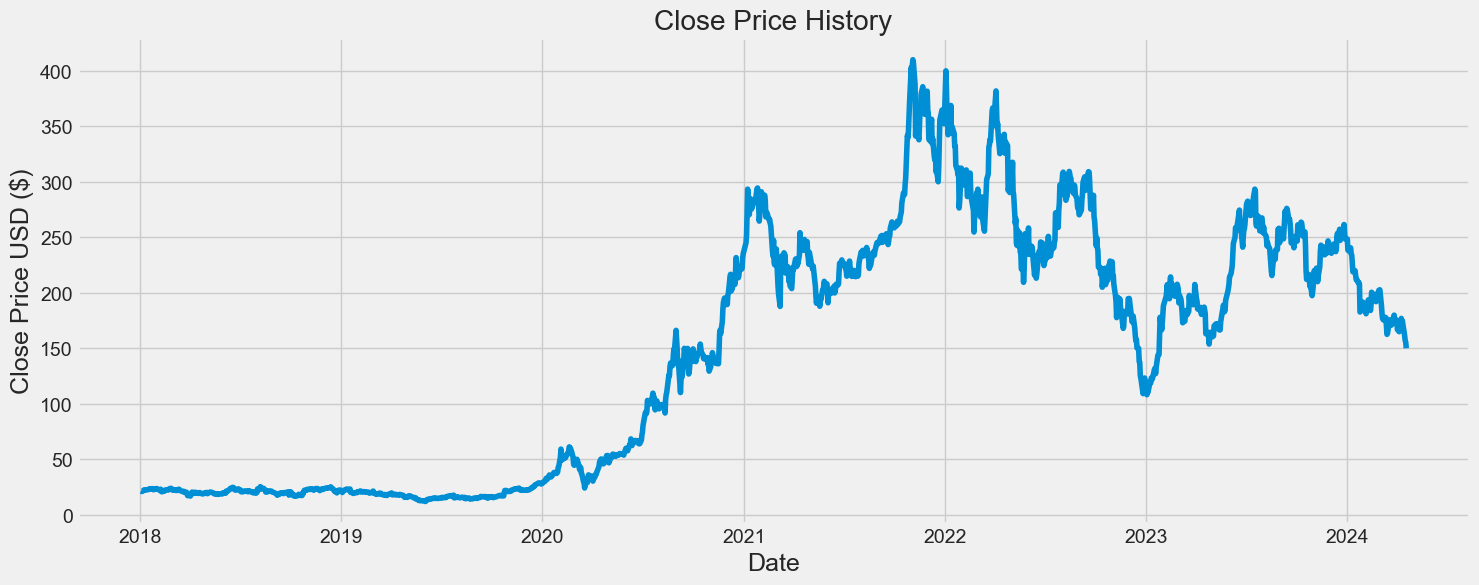

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Model Development

In [32]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1505

In [33]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02370959],
       [0.02316023],
       [0.02271974],
       ...,
       [0.36473509],
       [0.36056463],
       [0.34669662]])

In [34]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02370959, 0.02316023, 0.02271974, 0.02304801, 0.0263693 ,
       0.02591373, 0.02609964, 0.02662723, 0.02633748, 0.02698063,
       0.02816979, 0.027736  , 0.02864881, 0.02890674, 0.02911275,
       0.02795709, 0.02657531, 0.02744792, 0.02856674, 0.02794536,
       0.02936733, 0.02851984, 0.02759866, 0.02581994, 0.02596063,
       0.02780802, 0.0228219 , 0.02201629, 0.02290565, 0.02423383,
       0.02400772, 0.02597738, 0.02621521, 0.02609462, 0.02584841,
       0.02800398, 0.02898881, 0.02988822, 0.02881127, 0.02748309,
       0.02545147, 0.02615324, 0.02585679, 0.02499422, 0.02568092,
       0.02514496, 0.02482171, 0.02789344, 0.02727876, 0.02473127,
       0.02455876, 0.02384693, 0.0225422 , 0.02203806, 0.02303964,
       0.0217952 , 0.020529  , 0.02097117, 0.01678396, 0.01319972])]
[0.014598249993150625]

[array([0.02370959, 0.02316023, 0.02271974, 0.02304801, 0.0263693 ,
       0.02591373, 0.02609964, 0.02662723, 0.02633748, 0.02698063,
       0.02816979, 0.027736  , 0.0

### Using Simple RNN

In [35]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Build the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(SimpleRNN(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=5, epochs=25)  # Adjust epochs and batch size as needed


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.0412
Epoch 2/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0031
Epoch 3/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0025
Epoch 4/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0021
Epoch 5/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0016
Epoch 6/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0014
Epoch 7/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0015
Epoch 8/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0011
Epoch 9/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0010
Epoch 10/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0010
Epoch 11/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 9.7635e-04
Epoch 12/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 8.5187e-04
Epoch 13/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 9.3831e-04
Epoch 14/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0011
Epoch 15/25
289/289 ━━━━━━━━━━

In [36]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step


11.956790002648788

C:\Users\dell\AppData\Local\Temp\ipykernel_5000\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


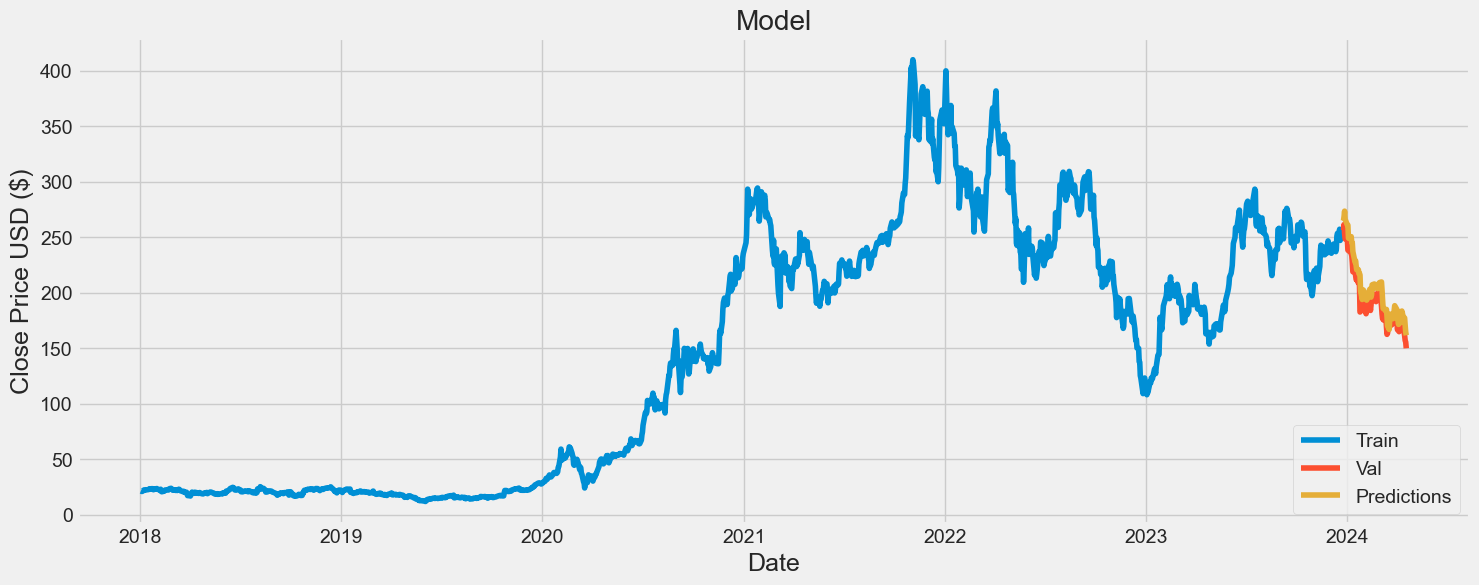

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Using LSTM

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=5, epochs=25)  # Adjust epochs and batch size as needed


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - loss: 0.0240
Epoch 2/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - loss: 0.0041
Epoch 3/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - loss: 0.0033
Epoch 4/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - loss: 0.0028
Epoch 5/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - loss: 0.0025
Epoch 6/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - loss: 0.0020
Epoch 7/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - loss: 0.0014
Epoch 8/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 0.0018
Epoch 9/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0013
Epoch 10/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - loss: 0.0014
Epoch 11/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - loss: 0.0013
Epoch 12/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - loss: 0.0013
Epoch 13/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 0.0012
Epoch 14/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - loss: 0.0012
Epoch 15/25
289/289 ━━━━━━━━━

In [39]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step


11.453315971012689

C:\Users\dell\AppData\Local\Temp\ipykernel_5000\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


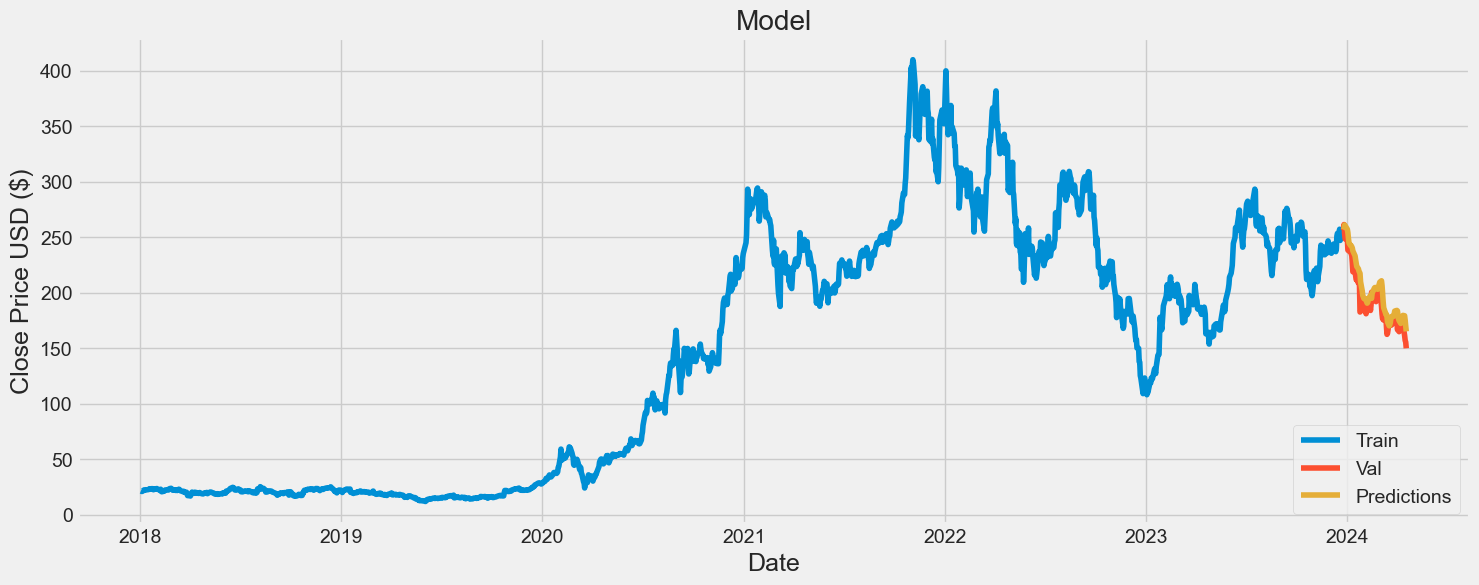

In [40]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Conclusion

### Upon comparing the two models, it becomes evident that LSTM outperforms Simple RNN since it  has a lower RMSE value.
